In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import linspace
from sklearn.neighbors import KernelDensity
import statsmodels.api as sm
from statsmodels.distributions.mixture_rvs import mixture_rvs
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
import sklearn
from sklearn.model_selection import GridSearchCV
import math
#from statsmodels.nonparametric.kde import KDEUnivariate
#from statsmodels.nonparametric.kernel_density import KDEMultivariate

## Data sampling

Normal distribution:

\begin{equation}
f(x|\mu,\sigma^2)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}

In [34]:
## normal distribution

N = 1000000 # dataset's size
x = np.zeros(N)

"""
# not efficient for big N
for i in range(N):
    x[i] = np.random.normal(0,1)
"""
mu, sigma = 0, 1 ## mean and standard deviation of sample.
x = np.random.normal(mu, sigma, N) ## 1e6 random numbers.

def normal_probability(mean, std, val): ## normal distribution for comparison.
    a = 1/(np.sqrt(2*np.pi)*std)
    diff = np.abs(np.power(val-mean, 2))
    b = np.exp(-(diff)/(2*std*std))
    return a*b

In [3]:
X=np.arange(-4,4,0.01) ## an array of numbers from -4 to 4
pdf_array = []
n=np.size(X)
for i in range(n):
    pdf = normal_probability(0, 1, X[i]) # probility of each number.
    pdf_array.append(pdf)

Text(0, 0.5, 'Probability Density Function')

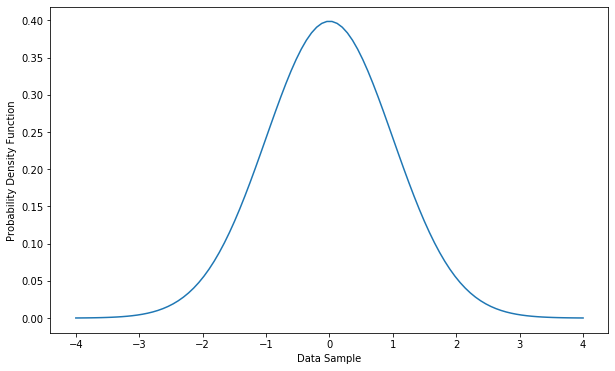

In [4]:
mu = 0 # mean
variance = 1 #variance
sigma = np.sqrt(variance) #standard deviation"
x1 = np.linspace(mu-4*variance,mu+4*variance, 100) 
plt.figure(figsize=(10,6))
plt.plot(x1, norm.pdf(x1, mu, sigma))  # plot probility of each number.
plt.xlabel("Data Sample")
plt.ylabel("Probability Density Function")

# Calculate Probably  Density

## 1) Binning

As we can see in the last figure, increasing the number of bins does not really help out:


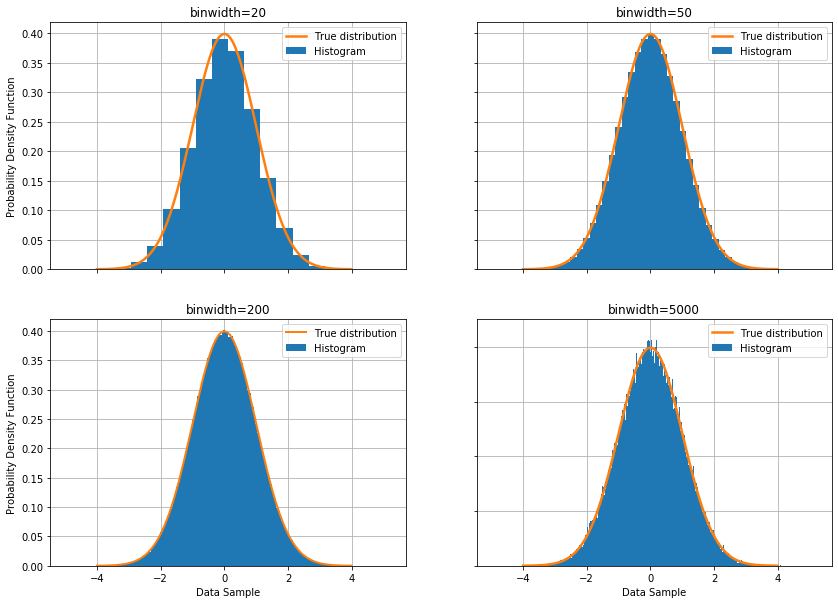

In [19]:
fig, axs = plt.subplots(2, 2,figsize=(14,10))
axs[0, 0].hist(x,bins=20,density=True,label='Histogram',zorder=5)
axs[0, 0].plot(X, pdf_array,linewidth="2.5",label="True distribution",zorder=10)
axs[0, 0].set_title('binwidth=20')
axs[0, 0].legend()
axs[0, 0].grid(True, zorder=-5)
axs[0, 1].hist(x,bins=50,density=True,label='Histogram',zorder=5)
axs[0, 1].plot(X, pdf_array,linewidth="2.5",label="True distribution",zorder=10)
axs[0, 1].set_title('binwidth=50')
axs[0, 1].legend()
axs[0, 1].grid(True, zorder=-5)
axs[1, 0].hist(x,bins=200,density=True,label='Histogram',zorder=5)
axs[1, 0].plot(X, pdf_array,linewidth="2",label="True distribution",zorder=10)
axs[1, 0].set_title('binwidth=200')
axs[1, 0].legend()
axs[1, 0].grid(True, zorder=-5)
axs[1, 1].hist(x,bins=5000,density=True,label='Histogram',zorder=5)
axs[1, 1].plot(X, pdf_array,linewidth="2.5",label="True distribution",zorder=10)
axs[1, 1].set_title('binwidth=5000')
axs[1, 1].legend()
axs[1, 1].grid(True, zorder=-5)
for ax in axs.flat:
    ax.set(xlabel='Data Sample', ylabel='Probability Density Function')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig("fig1.pdf")    
print("As we can see in the last figure, increasing the number of bins does not really help out:")

### Next, we can calculate the optimal bin size.

In [164]:
x_max = max(x) 
x_min = min(x) 
n_min = 10   #Minimum number of bins Ideal value = 10
n_max = 200  #Maximum number of bins  Ideal value =200
n_shift = 30     #number of shifts Ideal value = 30
M = np.array(range(n_min,n_max))
D = np.float(data_max-data_min)/M    ## Bin width 
d=len(D)
Cost = np.zeros((d,n_shift))   ## Cost function 

for i in range(np.size(M)):  #Computation of the cost function
    shift = linspace(0,D[i],n_shift)
    for j in range(n_shift):
        edges = linspace(x_min+shift[j]-D[i]/2,x_max+shift[j]-D[i]/2,M[i]+1) # shift the Bin edges
        binindex = np.digitize(x,edges) #Find binindex of each data point
        ki=np.bincount(binindex)[1:M[i]+1] #Find number of points in each bin
        k = np.mean(ki) #Mean of event count
        v = sum((ki-k)**2)/M[i] #Variance of event count
        Cost[i,j]+= (2*k-v)/((D[i])**2) #The cost Function
        
C=Cost.mean(1)

#Optimal Bin Size Selection
loc = np.argwhere(Cost==Cost.min())[0]
cmin = C.min()
idx  = np.where(C==cmin)
idx = idx[0][0]

print ('Optimal Bin Number :',M[idx])

Optimal Bin Number : 199


## 2) Kernel Estimator

In [24]:
N=1000000
x_train = np.random.normal(mu, sigma, N) #[:, np.newaxis]

### bandwidth 

In [ ]:
x = np.random.normal(0, 1, 1000000) ## 1e6 random numbers.

## perform the gridsearchCV for the optimal bandwidth 
## kernel we used is the gaussian but we also can write the another gridsearch for the optimal kernel too.
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),  
                    {'bandwidth': bandwidths},
                    cv=20)
grid.fit(x[:, None])

In [ ]:
grid.best_params_

## KDE

In [35]:
kde = sm.nonparametric.KDEUnivariate(x)
kde.fit() # Estimate the densities

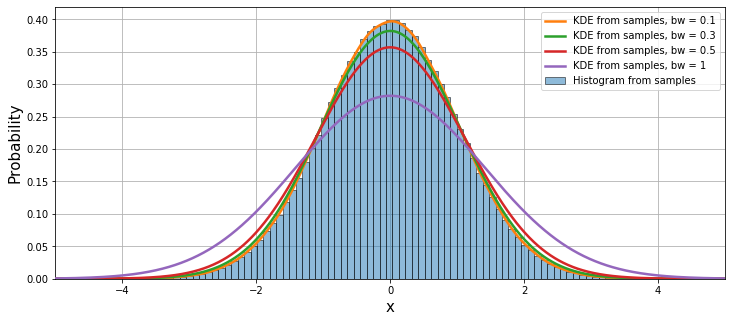

In [42]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

# Plot the histrogram
ax.hist(x, bins=100, label='Histogram from samples',
        zorder=5, edgecolor='k', density=True, alpha=0.5)

# Plot the KDE for various bandwidths
for bandwidth in [0.1, 0.3,0.5, 1]:
    kde.fit(bw=bandwidth) # Estimate the densities
    ax.plot(kde.support, kde.density, lw=2.5,  zorder=10,
            label='KDE from samples, bw = {}'.format(round(bandwidth, 2)))

plt.xlabel("x",fontsize="15")
plt.ylabel("Probability",fontsize="15")
ax.legend(loc='best')
ax.set_xlim([-5, 5])
ax.grid(True, zorder=-5)
plt.savefig("fig3.pdf")

## MOMENTS

In [3]:
def kernel_function(data,h, x):
    total = 0
    ## Uses Gaussian function for kernel approximation
    for i in range(len(data)):
        total += (pow(2*math.pi,-.5)*pow(math.e,-.5*pow((x-data[i])/h,2)))
    return total/(len(data)*h)

class Kernel:
    def __init__(self, data):
        self.data = data
        self.h = ((4*np.std(self.data)**5)/(3*len(self.data)))**.2

    def graph_kernel(self, x_values):
        l = []
        ## Get p(x) for all x
        for x in x_values:
            l.append(kernel_function(self.data, self.h, x))
        return l
    
    def pdf_kernel(self,x):
        return kernel_function(self.data, self.h, x)
    
    def cdf_kernel(self, x):
        total = 0
        low = min(self.data)
        steps = 1000
        step_size = (abs(low) + abs(x))/steps
        ## integrate over the pdf
        for i in range(steps):
            total+= kernel_function(self.data, self.h, low+step_size*i)*step_size
        return total

In [4]:
data = np.random.normal(0,1,1000000)

approx = Kernel(data)

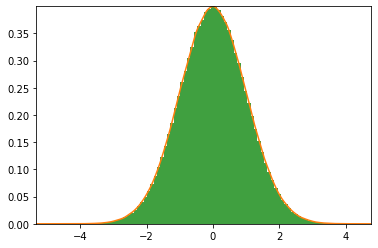

In [7]:
n, bins, patches = plt.hist(data, 100, density=1, facecolor='g', alpha=0.75)
low = min(data)
high= max(data)
x = np.linspace(low,high,1000)
y = approx.graph_kernel(x)
max_percent = max(y)
plt.axis([low, high, 0, max_percent])

plt.plot(x, y)
plt.show()


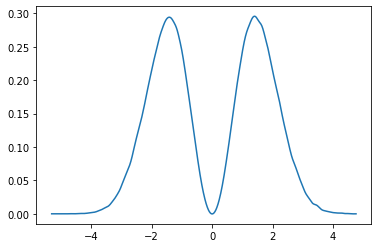

In [11]:
plt.plot(x,x**2*y)

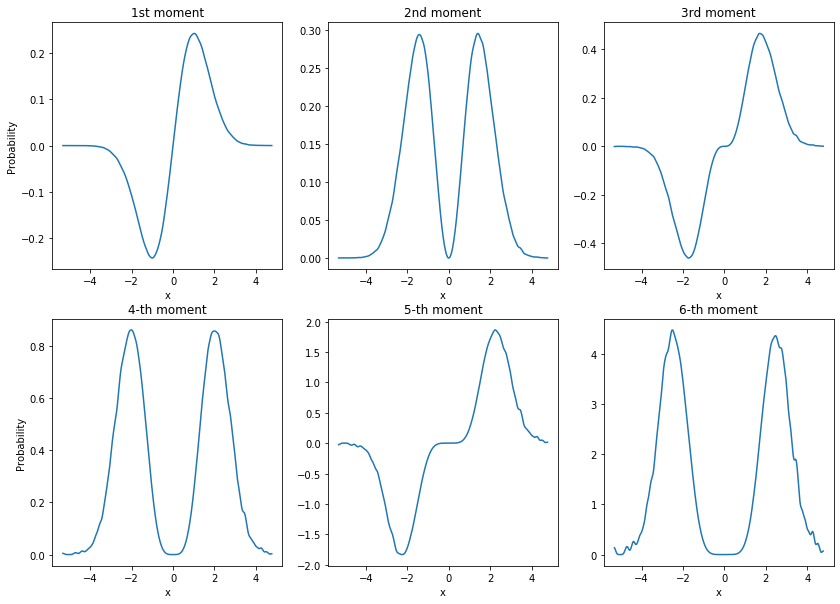

In [30]:
fig, axs = plt.subplots(2, 3,figsize=(14,10))
axs[0, 0].plot(x,x**1*y)
axs[0, 0].set_title('1st moment')
axs[0, 0].set(xlabel='x', ylabel='Probability')
axs[0, 1].plot(x,x**2*y)
axs[0, 1].set_title('2nd moment')
axs[0, 1].set(xlabel='x')
axs[0, 2].plot(x,x**3*y)
axs[0, 2].set_title('3rd moment')
axs[0, 2].set(xlabel='x')
axs[1, 0].plot(x,x**4*y)
axs[1, 0].set_title('4-th moment')
axs[1, 0].set(xlabel='x', ylabel='Probability')
axs[1, 1].plot(x,x**5*y)
axs[1, 1].set_title('5-th moment')
axs[1, 1].set(xlabel='x')
axs[1, 2].plot(x,x**6*y)
axs[1, 2].set_title('6-th moment')
axs[1, 2].set(xlabel='x')


plt.savefig("fig4.pdf")